In [2]:
#Instalo el paquete kneed
!pip install kneed

In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [4]:
features, true_labels = make_blobs(
     n_samples=200,
     centers=3,
     cluster_std=2.75,
     random_state=42
  )

In [5]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [6]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [9]:
kmeans = KMeans(
     init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42
 )

In [10]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [12]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [13]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [14]:
# The number of iterations required to converge
kmeans.n_iter_

10

In [15]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [18]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

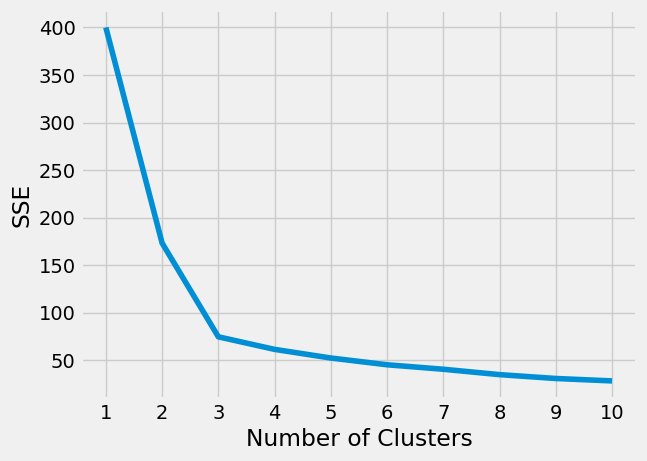

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


np.int64(3)

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)

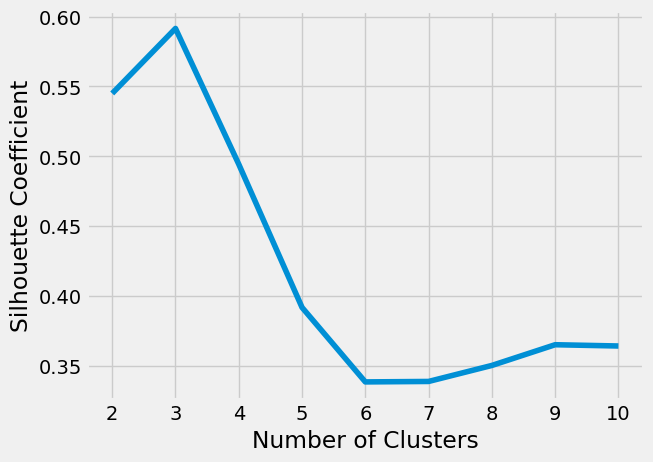

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [25]:
features, true_labels = make_moons(
     n_samples=250, noise=0.05, random_state=42
 )
scaled_features = scaler.fit_transform(features)

In [26]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)

In [27]:
kmeans_silhouette

np.float64(0.5)

In [28]:
dbscan_silhouette

np.float64(0.38)

In [29]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2)

0.46

In [30]:
round(ari_dbscan, 2)

1.0

Los valores de salida de ARI oscilan entre -1y 1. Una puntuación cercana a 0.0indica asignaciones aleatorias, y una puntuación cercana a 1indica clústeres perfectamente etiquetados.